In [1]:
import pickle
data = pickle.load(open('./processed_BA.b','rb'))
data.rename(columns={'pi':'label'}, inplace=True)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tqdm import tqdm_notebook as tqdm
from keras import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
%matplotlib inline

Using TensorFlow backend.


In [7]:
"""Building indexes"""
n = data.shape[0]
ys = list(data.label)

"""Retrieving the positive and negative indexes"""
neg_index = [k for k in range(len(ys)) if ys[k]==0]
pos_index = [k for k in range(len(ys)) if ys[k]==1]

"""Shuffling both the positive and negative indexes"""
np.random.seed(seed=0)
np.random.shuffle(neg_index)
np.random.shuffle(pos_index)

"""Computing train and test index sets for the chosen number of folds"""
cv = 10

s = len(neg_index)//cv
neg_index_list = [neg_index[k*s:(k+1)*s] for k in range(cv-1)]
neg_index_list.append(neg_index[(cv-1)*s:])
assert(np.sum([len(e) for e in neg_index_list])==len(neg_index)) # Check on negative index completion

s = len(pos_index)//cv
pos_index_list = [pos_index[k*s:(k+1)*s] for k in range(cv-1)]
pos_index_list.append(pos_index[(cv-1)*s:])
assert(np.sum([len(e) for e in pos_index_list])==len(pos_index))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_301 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_301 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_601 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_301 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 148s 18ms/step - loss: 0.3297 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.2084 - categorical_accuracy: 1.0000 - val_loss: 0.0402 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.1815 - categorical_accuracy: 1.0000 - val_loss: 0.0395 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.1705 - categorical_accuracy: 1.0000 - val_loss: 0.0352 - val_categorical_accuracy: 1.0000
Epoch 5/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.1609 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.66
_________________________________________________________________
Layer (

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 147s 18ms/step - loss: 0.3203 - categorical_accuracy: 1.0000 - val_loss: 0.0626 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.1859 - categorical_accuracy: 1.0000 - val_loss: 0.0390 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.1566 - categorical_accuracy: 1.0000 - val_loss: 0.0200 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.1410 - categorical_accuracy: 1.0000 - val_loss: 0.0450 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6871794871794872
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
______________________________

8413/8413 [==============================] - 17s 2ms/step - loss: 0.1880 - categorical_accuracy: 1.0000 - val_loss: 0.0381 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1506 - categorical_accuracy: 1.0000 - val_loss: 0.0599 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6794258373205743
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_314 (Embedding)    (None, 150, 50)           70000     
_________________________________________________________________
lstm_314 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________

8413/8413 [==============================] - 17s 2ms/step - loss: 0.1849 - categorical_accuracy: 1.0000 - val_loss: 0.0802 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1493 - categorical_accuracy: 1.0000 - val_loss: 0.0245 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1305 - categorical_accuracy: 1.0000 - val_loss: 0.0337 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6631578947368421
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_318 (Embedding)    (None, 150, 50)           90000     
_________________________________________________________________
lstm_318 (LSTM)              (None, 32)                10624  

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 166s 20ms/step - loss: 0.3252 - categorical_accuracy: 1.0000 - val_loss: 0.0596 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1740 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1342 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1158 - categorical_accuracy: 1.0000 - val_loss: 0.0523 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6859903381642513
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
______________________________

8413/8413 [==============================] - 162s 19ms/step - loss: 0.3286 - categorical_accuracy: 1.0000 - val_loss: 0.0170 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1745 - categorical_accuracy: 1.0000 - val_loss: 0.0283 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6480446927374303
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_327 (Embedding)    (None, 150, 50)           135000    
_________________________________________________________________
lstm_327 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_______________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_331 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_331 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_661 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_331 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 185s 22ms/step - loss: 0.3298 - categorical_accuracy: 1.0000 - val_loss: 0.0312 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.2011 - categorical_accuracy: 1.0000 - val_loss: 0.0380 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.611111111111111
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_336 (Embedding)    (None, 150, 50)           30000     
_________________________________________________________________
lstm_336 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256

8413/8413 [==============================] - 186s 22ms/step - loss: 0.3268 - categorical_accuracy: 1.0000 - val_loss: 0.0432 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1865 - categorical_accuracy: 1.0000 - val_loss: 0.0344 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1562 - categorical_accuracy: 1.0000 - val_loss: 0.0284 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1401 - categorical_accuracy: 1.0000 - val_loss: 0.0099 - val_categorical_accuracy: 1.0000
Epoch 5/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1295 - categorical_accuracy: 1.0000 - val_loss: 0.0338 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7319587628865979
_________________________________________________________________
Layer (type)                 Output Shape           

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 189s 22ms/step - loss: 0.3297 - categorical_accuracy: 1.0000 - val_loss: 0.0535 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1814 - categorical_accuracy: 1.0000 - val_loss: 0.0248 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1517 - categorical_accuracy: 1.0000 - val_loss: 0.0297 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6564102564102564
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_344 (Embedding)    (None, 150, 50)           70000     
_________________________________________________________________
l

Epoch 2/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1830 - categorical_accuracy: 1.0000 - val_loss: 0.0123 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1476 - categorical_accuracy: 1.0000 - val_loss: 0.0243 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6595744680851064
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_348 (Embedding)    (None, 150, 50)           90000     
_________________________________________________________________
lstm_348 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
______________________

8413/8413 [==============================] - 18s 2ms/step - loss: 0.1357 - categorical_accuracy: 1.0000 - val_loss: 0.0098 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1192 - categorical_accuracy: 1.0000 - val_loss: 0.0398 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6926829268292682
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_352 (Embedding)    (None, 150, 50)           110000    
_________________________________________________________________
lstm_352 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 201s 24ms/step - loss: 0.3284 - categorical_accuracy: 1.0000 - val_loss: 0.0202 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1727 - categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6461538461538462
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_357 (Embedding)    (None, 150, 50)           135000    
_________________________________________________________________
lstm_357 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 25

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_361 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_361 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_721 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_361 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 209s 25ms/step - loss: 0.3270 - categorical_accuracy: 1.0000 - val_loss: 0.0771 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.2042 - categorical_accuracy: 1.0000 - val_loss: 0.0325 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1800 - categorical_accuracy: 1.0000 - val_loss: 0.0140 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1718 - categorical_accuracy: 1.0000 - val_loss: 0.0873 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6017699115044248
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
______________________________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 213s 25ms/step - loss: 0.3251 - categorical_accuracy: 1.0000 - val_loss: 0.0223 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 19s 2ms/step - loss: 0.1909 - categorical_accuracy: 1.0000 - val_loss: 0.0861 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.5945945945945946
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_370 (Embedding)    (None, 150, 50)           50000     
_________________________________________________________________
lstm_370 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 25

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_374 (Embedding)    (None, 150, 50)           70000     
_________________________________________________________________
lstm_374 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_747 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_374 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 219s 26ms/step - loss: 0.3327 - categorical_accuracy: 1.0000 - val_loss: 0.0269 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 19s 2ms/step - loss: 0.1836 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.5800000000000001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_379 (Embedding)    (None, 150, 50)           95000     
_________________________________________________________________
lstm_379 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 25

Epoch 2/10
8413/8413 [==============================] - 19s 2ms/step - loss: 0.1811 - categorical_accuracy: 1.0000 - val_loss: 0.0442 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1440 - categorical_accuracy: 1.0000 - val_loss: 0.0416 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 19s 2ms/step - loss: 0.1252 - categorical_accuracy: 1.0000 - val_loss: 0.0275 - val_categorical_accuracy: 1.0000
Epoch 5/10
8413/8413 [==============================] - 19s 2ms/step - loss: 0.1114 - categorical_accuracy: 1.0000 - val_loss: 0.0285 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6428571428571428
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_383 

8413/8413 [==============================] - 18s 2ms/step - loss: 0.1333 - categorical_accuracy: 1.0000 - val_loss: 0.0385 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6280193236714976
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_387 (Embedding)    (None, 150, 50)           135000    
_________________________________________________________________
lstm_387 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_773 (Activation)  (None, 256)               0         
_________________________________________________________________
drop

8413/8413 [==============================] - 19s 2ms/step - loss: 0.1743 - categorical_accuracy: 1.0000 - val_loss: 0.0238 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 19s 2ms/step - loss: 0.1345 - categorical_accuracy: 1.0000 - val_loss: 0.0511 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6226415094339623


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_391 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_391 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_781 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_391 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 231s 27ms/step - loss: 0.3323 - categorical_accuracy: 1.0000 - val_loss: 0.0574 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.2125 - categorical_accuracy: 1.0000 - val_loss: 0.0350 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1879 - categorical_accuracy: 1.0000 - val_loss: 0.0299 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1752 - categorical_accuracy: 1.0000 - val_loss: 0.1071 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7330316742081446
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
______________________________

8413/8413 [==============================] - 230s 27ms/step - loss: 0.3270 - categorical_accuracy: 1.0000 - val_loss: 0.0300 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1955 - categorical_accuracy: 1.0000 - val_loss: 0.0822 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7357512953367876
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_400 (Embedding)    (None, 150, 50)           50000     
_________________________________________________________________
lstm_400 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_______________________________

8413/8413 [==============================] - 18s 2ms/step - loss: 0.1620 - categorical_accuracy: 1.0000 - val_loss: 0.0632 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7422680412371134
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_404 (Embedding)    (None, 150, 50)           70000     
_________________________________________________________________
lstm_404 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_807 (Activation)  (None, 256)               0         
_________________________________________________________________
drop

8413/8413 [==============================] - 18s 2ms/step - loss: 0.1844 - categorical_accuracy: 1.0000 - val_loss: 0.0327 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1518 - categorical_accuracy: 1.0000 - val_loss: 0.0744 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.76056338028169
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_408 (Embedding)    (None, 150, 50)           90000     
_________________________________________________________________
lstm_408 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
___________________________________

8413/8413 [==============================] - 18s 2ms/step - loss: 0.1264 - categorical_accuracy: 1.0000 - val_loss: 0.0406 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7661691542288558
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_412 (Embedding)    (None, 150, 50)           110000    
_________________________________________________________________
lstm_412 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_823 (Activation)  (None, 256)               0         
_________________________________________________________________
drop

8413/8413 [==============================] - 18s 2ms/step - loss: 0.1430 - categorical_accuracy: 1.0000 - val_loss: 0.0633 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.8039215686274511
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_416 (Embedding)    (None, 150, 50)           130000    
_________________________________________________________________
lstm_416 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_831 (Activation)  (None, 256)               0         
_________________________________________________________________
drop

8413/8413 [==============================] - 249s 30ms/step - loss: 0.3291 - categorical_accuracy: 1.0000 - val_loss: 0.0953 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 19s 2ms/step - loss: 0.1802 - categorical_accuracy: 1.0000 - val_loss: 0.0439 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1425 - categorical_accuracy: 1.0000 - val_loss: 0.0435 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1223 - categorical_accuracy: 1.0000 - val_loss: 0.0255 - val_categorical_accuracy: 1.0000
Epoch 5/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1064 - categorical_accuracy: 1.0000 - val_loss: 0.0274 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7897435897435897
_________________________________________________________________
Layer (type)                 Output Shape           

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_421 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_421 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_841 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_421 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 246s 29ms/step - loss: 0.3327 - categorical_accuracy: 1.0000 - val_loss: 0.1070 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.2041 - categorical_accuracy: 1.0000 - val_loss: 0.0578 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1801 - categorical_accuracy: 1.0000 - val_loss: 0.0532 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1710 - categorical_accuracy: 1.0000 - val_loss: 0.0485 - val_categorical_accuracy: 1.0000
Epoch 5/10
8413/8413 [==============================] - 18s 2ms/step - loss: 0.1639 - categorical_accuracy: 1.0000 - val_loss: 0.0496 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6464646464646464
___________________________________________________________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 226s 27ms/step - loss: 0.3188 - categorical_accuracy: 1.0000 - val_loss: 0.0844 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1913 - categorical_accuracy: 1.0000 - val_loss: 0.0386 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1580 - categorical_accuracy: 1.0000 - val_loss: 0.0391 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6594594594594594
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_430 (Embedding)    (None, 150, 50)           50000     
_________________________________________________________________
l

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 228s 27ms/step - loss: 0.3295 - categorical_accuracy: 1.0000 - val_loss: 0.0569 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1849 - categorical_accuracy: 1.0000 - val_loss: 0.0298 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1527 - categorical_accuracy: 1.0000 - val_loss: 0.0524 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.689655172413793
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_435 (Embedding)    (None, 150, 50)           75000     
_________________________________________________________________
ls

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 231s 27ms/step - loss: 0.3330 - categorical_accuracy: 1.0000 - val_loss: 0.1117 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1788 - categorical_accuracy: 1.0000 - val_loss: 0.0221 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1424 - categorical_accuracy: 1.0000 - val_loss: 0.0361 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6700507614213199
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_439 (Embedding)    (None, 150, 50)           95000     
_________________________________________________________________
l

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 231s 27ms/step - loss: 0.3282 - categorical_accuracy: 1.0000 - val_loss: 0.0496 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1779 - categorical_accuracy: 1.0000 - val_loss: 0.0799 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6572769953051644
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_444 (Embedding)    (None, 150, 50)           120000    
_________________________________________________________________
lstm_444 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 25

F1-score on current fold : 0.691588785046729
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_448 (Embedding)    (None, 150, 50)           140000    
_________________________________________________________________
lstm_448 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_895 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_448 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (N

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_451 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_451 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_901 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_451 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 242s 29ms/step - loss: 0.3301 - categorical_accuracy: 1.0000 - val_loss: 0.0748 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.2030 - categorical_accuracy: 1.0000 - val_loss: 0.0761 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.5829145728643217
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_456 (Embedding)    (None, 150, 50)           30000     
_________________________________________________________________
lstm_456 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 25

8413/8413 [==============================] - 17s 2ms/step - loss: 0.1605 - categorical_accuracy: 1.0000 - val_loss: 0.0634 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6606334841628959
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_460 (Embedding)    (None, 150, 50)           50000     
_________________________________________________________________
lstm_460 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_919 (Activation)  (None, 256)               0         
_________________________________________________________________
drop

8413/8413 [==============================] - 17s 2ms/step - loss: 0.1554 - categorical_accuracy: 1.0000 - val_loss: 0.0585 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6666666666666666
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_464 (Embedding)    (None, 150, 50)           70000     
_________________________________________________________________
lstm_464 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_927 (Activation)  (None, 256)               0         
_________________________________________________________________
drop

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 248s 30ms/step - loss: 0.3276 - categorical_accuracy: 1.0000 - val_loss: 0.0853 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1803 - categorical_accuracy: 1.0000 - val_loss: 0.0528 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1435 - categorical_accuracy: 1.0000 - val_loss: 0.0752 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.625
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_469 (Embedding)    (None, 150, 50)           95000     
_________________________________________________________________
lstm_469 (LSTM

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 257s 31ms/step - loss: 0.3259 - categorical_accuracy: 1.0000 - val_loss: 0.0795 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1758 - categorical_accuracy: 1.0000 - val_loss: 0.0561 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1427 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1192 - categorical_accuracy: 1.0000 - val_loss: 0.0536 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6543778801843319
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
______________________________

8413/8413 [==============================] - 258s 31ms/step - loss: 0.3356 - categorical_accuracy: 1.0000 - val_loss: 0.0689 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1785 - categorical_accuracy: 1.0000 - val_loss: 0.0853 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6126126126126127
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_477 (Embedding)    (None, 150, 50)           135000    
_________________________________________________________________
lstm_477 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_______________________________

8413/8413 [==============================] - 17s 2ms/step - loss: 0.1696 - categorical_accuracy: 1.0000 - val_loss: 0.0265 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1315 - categorical_accuracy: 1.0000 - val_loss: 0.0460 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6602870813397128


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_481 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_481 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_961 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_481 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 268s 32ms/step - loss: 0.3275 - categorical_accuracy: 1.0000 - val_loss: 0.0559 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.2042 - categorical_accuracy: 1.0000 - val_loss: 0.0441 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1843 - categorical_accuracy: 1.0000 - val_loss: 0.0559 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6231155778894473
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_486 (Embedding)    (None, 150, 50)           30000     
_________________________________________________________________
l

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_490 (Embedding)    (None, 150, 50)           50000     
_________________________________________________________________
lstm_490 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_979 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_490 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 265s 32ms/step - loss: 0.3278 - categorical_accuracy: 1.0000 - val_loss: 0.0742 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1804 - categorical_accuracy: 1.0000 - val_loss: 0.0399 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1485 - categorical_accuracy: 1.0000 - val_loss: 0.0231 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1290 - categorical_accuracy: 1.0000 - val_loss: 0.0577 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6781115879828327
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
______________________________

Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1841 - categorical_accuracy: 1.0000 - val_loss: 0.0420 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1451 - categorical_accuracy: 1.0000 - val_loss: 0.0885 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7058823529411765
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_499 (Embedding)    (None, 150, 50)           95000     
_________________________________________________________________
lstm_499 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
______________________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 271s 32ms/step - loss: 0.3315 - categorical_accuracy: 1.0000 - val_loss: 0.0409 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1792 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6530612244897959
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_504 (Embedding)    (None, 150, 50)           120000    
_________________________________________________________________
lstm_504 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 25

8413/8413 [==============================] - 280s 33ms/step - loss: 0.3277 - categorical_accuracy: 1.0000 - val_loss: 0.0296 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1787 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6871794871794872
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_508 (Embedding)    (None, 150, 50)           140000    
_________________________________________________________________
lstm_508 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_______________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_511 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_511 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_1021 (Activation) (None, 256)               0         
_________________________________________________________________
dropout_511 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 280s 33ms/step - loss: 0.3384 - categorical_accuracy: 1.0000 - val_loss: 0.0580 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.2100 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1821 - categorical_accuracy: 1.0000 - val_loss: 0.0801 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6391752577319587
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_516 (Embedding)    (None, 150, 50)           30000     
_________________________________________________________________
l

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 236s 28ms/step - loss: 0.3214 - categorical_accuracy: 1.0000 - val_loss: 0.0995 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.1864 - categorical_accuracy: 1.0000 - val_loss: 0.0163 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.1584 - categorical_accuracy: 1.0000 - val_loss: 0.0208 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6994535519125683
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_520 (Embedding)    (None, 150, 50)           50000     
_________________________________________________________________
l

8413/8413 [==============================] - 16s 2ms/step - loss: 0.1564 - categorical_accuracy: 1.0000 - val_loss: 0.0876 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.646551724137931
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_524 (Embedding)    (None, 150, 50)           70000     
_________________________________________________________________
lstm_524 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_1047 (Activation) (None, 256)               0         
_________________________________________________________________
dropo

8413/8413 [==============================] - 16s 2ms/step - loss: 0.1479 - categorical_accuracy: 1.0000 - val_loss: 0.0422 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6903553299492386
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_528 (Embedding)    (None, 150, 50)           90000     
_________________________________________________________________
lstm_528 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_1055 (Activation) (None, 256)               0         
_________________________________________________________________
drop

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 241s 29ms/step - loss: 0.3285 - categorical_accuracy: 1.0000 - val_loss: 0.0320 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.1760 - categorical_accuracy: 1.0000 - val_loss: 0.0522 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.694300518134715
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_533 (Embedding)    (None, 150, 50)           115000    
_________________________________________________________________
lstm_533 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256

F1-score on current fold : 0.6602870813397128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_537 (Embedding)    (None, 150, 50)           135000    
_________________________________________________________________
lstm_537 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_1073 (Activation) (None, 256)               0         
_________________________________________________________________
dropout_537 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (

8413/8413 [==============================] - 17s 2ms/step - loss: 0.1057 - categorical_accuracy: 1.0000 - val_loss: 0.0337 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6947368421052632


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_541 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_541 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_1081 (Activation) (None, 256)               0         
_________________________________________________________________
dropout_541 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 260s 31ms/step - loss: 0.3305 - categorical_accuracy: 1.0000 - val_loss: 0.0365 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.2039 - categorical_accuracy: 1.0000 - val_loss: 0.0539 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6292134831460674
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_546 (Embedding)    (None, 150, 50)           30000     
_________________________________________________________________
lstm_546 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 25

8413/8413 [==============================] - 17s 2ms/step - loss: 0.1919 - categorical_accuracy: 1.0000 - val_loss: 0.0314 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1623 - categorical_accuracy: 1.0000 - val_loss: 0.0332 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.670391061452514
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_550 (Embedding)    (None, 150, 50)           50000     
_________________________________________________________________
lstm_550 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
__________________________________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 268s 32ms/step - loss: 0.3324 - categorical_accuracy: 1.0000 - val_loss: 0.0848 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1847 - categorical_accuracy: 1.0000 - val_loss: 0.0538 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1494 - categorical_accuracy: 1.0000 - val_loss: 0.0428 - val_categorical_accuracy: 1.0000
Epoch 4/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1335 - categorical_accuracy: 1.0000 - val_loss: 0.0298 - val_categorical_accuracy: 1.0000
Epoch 5/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1212 - categorical_accuracy: 1.0000 - val_loss: 0.1013 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7063829787234043
___________________________________________________________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 270s 32ms/step - loss: 0.3227 - categorical_accuracy: 1.0000 - val_loss: 0.0532 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 17s 2ms/step - loss: 0.1763 - categorical_accuracy: 1.0000 - val_loss: 0.0693 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7300000000000001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_559 (Embedding)    (None, 150, 50)           95000     
_________________________________________________________________
lstm_559 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 25

Epoch 2/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.1827 - categorical_accuracy: 1.0000 - val_loss: 0.0634 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6804123711340206
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_563 (Embedding)    (None, 150, 50)           115000    
_________________________________________________________________
lstm_563 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_1125 (Activation) (None, 256)               0         
___________________________________________________________

Train on 8413 samples, validate on 2104 samples
Epoch 1/10
8413/8413 [==============================] - 264s 31ms/step - loss: 0.3216 - categorical_accuracy: 1.0000 - val_loss: 0.0485 - val_categorical_accuracy: 1.0000
Epoch 2/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.1698 - categorical_accuracy: 1.0000 - val_loss: 0.0363 - val_categorical_accuracy: 1.0000
Epoch 3/10
8413/8413 [==============================] - 16s 2ms/step - loss: 0.1340 - categorical_accuracy: 1.0000 - val_loss: 0.0844 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7476635514018691
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_568 (Embedding)    (None, 150, 50)           140000    
_________________________________________________________________
l

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_571 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_571 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_1141 (Activation) (None, 256)               0         
_________________________________________________________________
dropout_571 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 8402 samples, validate on 2101 samples
Epoch 1/10
8402/8402 [==============================] - 275s 33ms/step - loss: 0.3316 - categorical_accuracy: 1.0000 - val_loss: 0.1246 - val_categorical_accuracy: 1.0000
Epoch 2/10
8402/8402 [==============================] - 17s 2ms/step - loss: 0.2050 - categorical_accuracy: 1.0000 - val_loss: 0.0282 - val_categorical_accuracy: 1.0000
Epoch 3/10
8402/8402 [==============================] - 17s 2ms/step - loss: 0.1844 - categorical_accuracy: 1.0000 - val_loss: 0.1202 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6502057613168724
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_576 (Embedding)    (None, 150, 50)           30000     
_________________________________________________________________
l

Train on 8402 samples, validate on 2101 samples
Epoch 1/10
8402/8402 [==============================] - 283s 34ms/step - loss: 0.3200 - categorical_accuracy: 1.0000 - val_loss: 0.0669 - val_categorical_accuracy: 1.0000
Epoch 2/10
8402/8402 [==============================] - 16s 2ms/step - loss: 0.1855 - categorical_accuracy: 1.0000 - val_loss: 0.0209 - val_categorical_accuracy: 1.0000
Epoch 3/10
8402/8402 [==============================] - 16s 2ms/step - loss: 0.1531 - categorical_accuracy: 1.0000 - val_loss: 0.0209 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7368421052631579
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_581 (Embedding)    (None, 150, 50)           55000     
_________________________________________________________________
l

Train on 8402 samples, validate on 2101 samples
Epoch 1/10
8402/8402 [==============================] - 287s 34ms/step - loss: 0.3340 - categorical_accuracy: 1.0000 - val_loss: 0.0269 - val_categorical_accuracy: 1.0000
Epoch 2/10
8402/8402 [==============================] - 17s 2ms/step - loss: 0.1882 - categorical_accuracy: 1.0000 - val_loss: 0.0137 - val_categorical_accuracy: 1.0000
Epoch 3/10
8402/8402 [==============================] - 17s 2ms/step - loss: 0.1523 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7087378640776699
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_585 (Embedding)    (None, 150, 50)           75000     
_________________________________________________________________
l

Epoch 3/10
8402/8402 [==============================] - 16s 2ms/step - loss: 0.1432 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_categorical_accuracy: 1.0000
Epoch 4/10
8402/8402 [==============================] - 17s 2ms/step - loss: 0.1247 - categorical_accuracy: 1.0000 - val_loss: 0.0455 - val_categorical_accuracy: 1.0000
Epoch 5/10
8402/8402 [==============================] - 17s 2ms/step - loss: 0.1091 - categorical_accuracy: 1.0000 - val_loss: 0.0434 - val_categorical_accuracy: 1.0000
Epoch 6/10
8402/8402 [==============================] - 17s 2ms/step - loss: 0.0953 - categorical_accuracy: 1.0000 - val_loss: 0.0518 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7210300429184548
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_589 

8402/8402 [==============================] - 22s 3ms/step - loss: 0.1770 - categorical_accuracy: 1.0000 - val_loss: 0.0253 - val_categorical_accuracy: 1.0000
Epoch 3/10
8402/8402 [==============================] - 22s 3ms/step - loss: 0.1459 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.7115384615384613
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_593 (Embedding)    (None, 150, 50)           115000    
_________________________________________________________________
lstm_593 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________

Train on 8402 samples, validate on 2101 samples
Epoch 1/10
8402/8402 [==============================] - 369s 44ms/step - loss: 0.3220 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_categorical_accuracy: 1.0000
Epoch 2/10
8402/8402 [==============================] - 19s 2ms/step - loss: 0.1720 - categorical_accuracy: 1.0000 - val_loss: 0.0281 - val_categorical_accuracy: 1.0000
Epoch 3/10
8402/8402 [==============================] - 18s 2ms/step - loss: 0.1330 - categorical_accuracy: 1.0000 - val_loss: 0.0231 - val_categorical_accuracy: 1.0000
Epoch 4/10
8402/8402 [==============================] - 18s 2ms/step - loss: 0.1135 - categorical_accuracy: 1.0000 - val_loss: 0.0263 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.746268656716418
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_______________________________

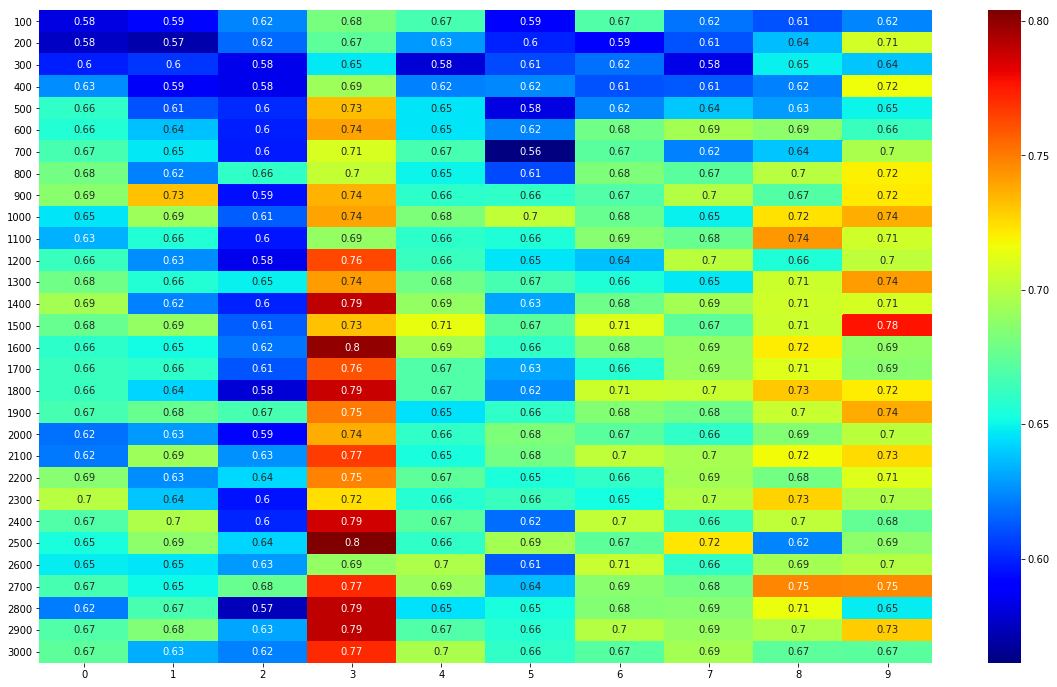

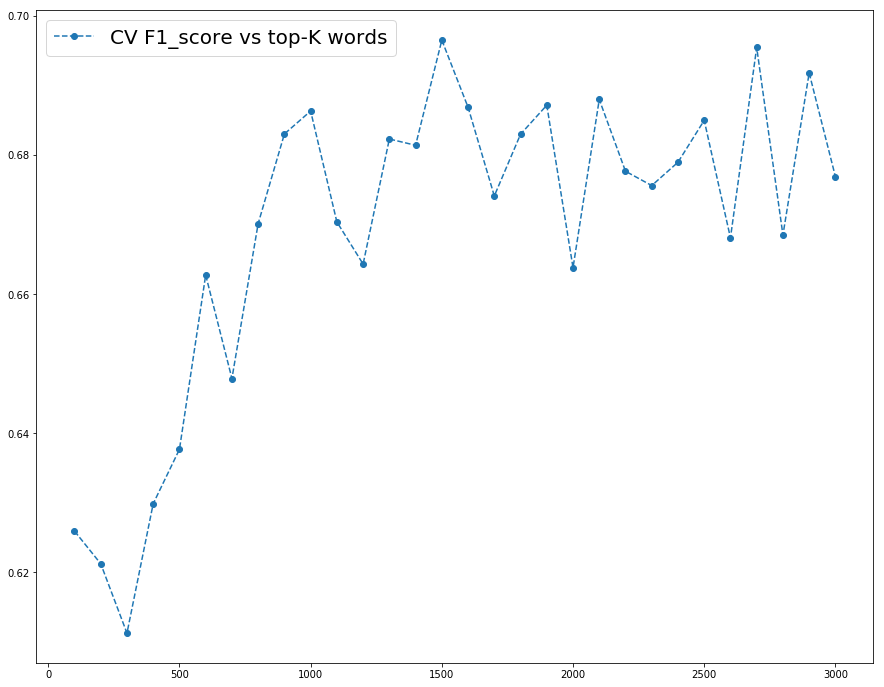

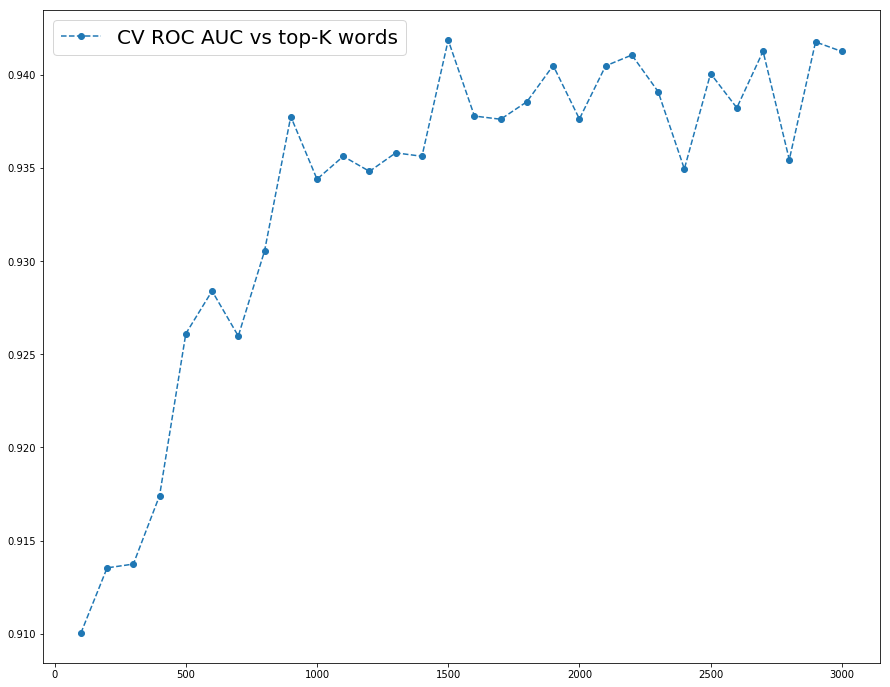

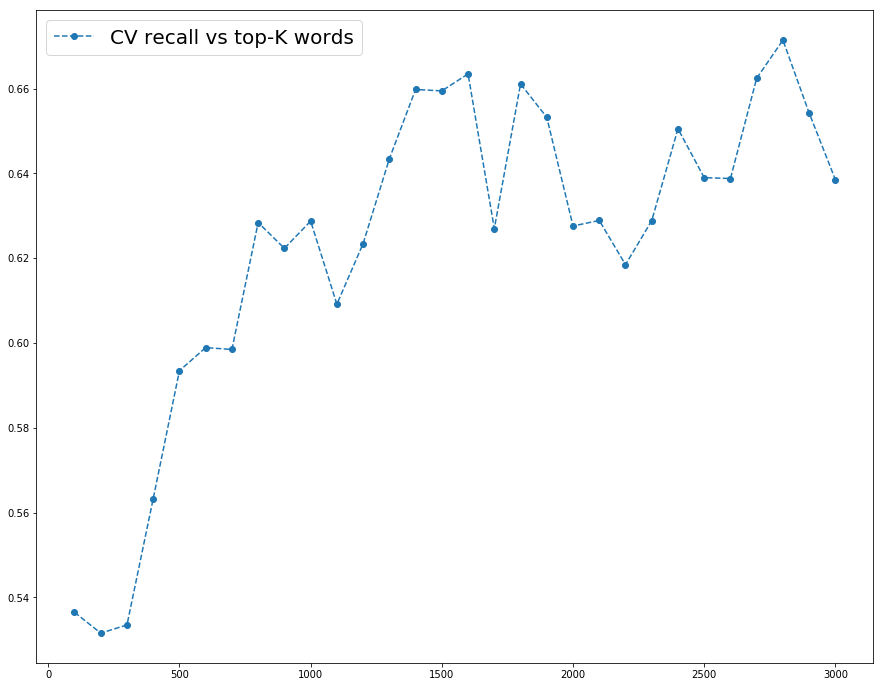

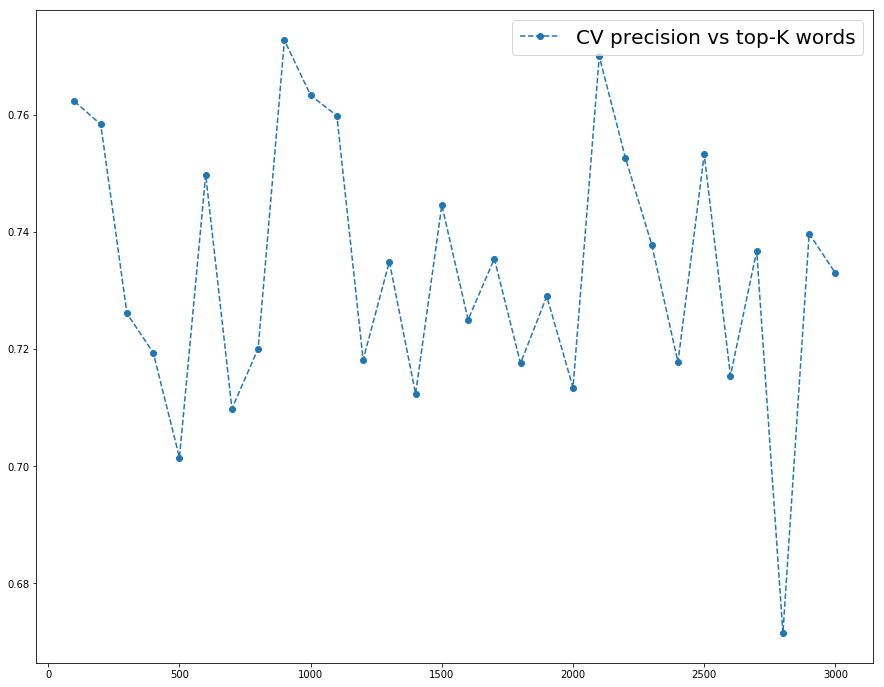

In [10]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

cv = 10
quotas = list(range(100,3100,100))
n_pos = len(ind_pos)
n_neg = len(ind_neg)

f_scores = {k: {max_words: 0. for max_words in quotas} for k in range(cv)}
precisions = {k: {max_words: 0. for max_words in quotas} for k in range(cv)}
recalls = {k: {max_words: 0. for max_words in quotas} for k in range(cv)}
aucs = {k: {max_words: 0. for max_words in quotas} for k in range(cv)}

for k in tqdm(range(cv)):
    """Splitting the data"""
    pos_test = pos_index_list[k]
    neg_test = neg_index_list[k]
    pos_train = list(set(pos_index).difference(pos_test))
    neg_train = list(set(neg_index).difference(neg_test))
    
    X_train = list(data.text.iloc[pos_train]) + list(data.text.iloc[neg_train])
    Y_train = list(data.label.iloc[pos_train]) + list(data.label.iloc[neg_train])
    
    X_test = list(data.text.iloc[pos_test]) + list(data.text.iloc[neg_test])
    Y_test = list(data.label.iloc[pos_test]) + list(data.label.iloc[neg_test])
    
    for max_words in tqdm(quotas):
        """Initializing the model parameters"""
        max_len = 150
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(X_train)
        sequences = tok.texts_to_sequences(X_train)
        sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

        """Initializing the model"""
        model = RNN()
        model.summary()
        model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=[metrics.categorical_accuracy])

        """Training the model"""
        model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
              validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

        """Testing the model"""
        test_sequences = tok.texts_to_sequences(X_test)
        test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
        preds = model.predict(test_sequences_matrix)
        preds = preds.reshape(-1,)
        f_scores[k][max_words] = f1_score(Y_test, [int(p>0.5) for p in preds])
        precisions[k][max_words] = precision_score(Y_test, [int(p>0.5) for p in preds])
        recalls[k][max_words] = recall_score(Y_test, [int(p>0.5) for p in preds])
        aucs[k][max_words] = roc_auc_score(Y_test, preds)
        print('F1-score on current fold : {}'.format(f_scores[k][max_words]))
        
        
f_scores = pd.DataFrame(f_scores)

plt.figure(figsize=(20,12))
sns.heatmap(f_scores, cmap='jet', annot=True)
plt.show()

plt.figure(figsize=(15,12))
plt.plot(f_scores.T.apply(np.mean), 'o--', label='CV F1_score vs top-K words')
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(15,12))
plt.plot(pd.DataFrame(aucs).T.apply(np.mean), 'o--', label='CV ROC AUC vs top-K words')
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(15,12))
plt.plot(pd.DataFrame(recalls).T.apply(np.mean), 'o--', label='CV recall vs top-K words')
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(15,12))
plt.plot(pd.DataFrame(precisions).T.apply(np.mean), 'o--', label='CV precision vs top-K words')
plt.legend(fontsize=20)
plt.show()

In [11]:
f_scores.T.apply(np.mean)

100     0.625942
200     0.621245
300     0.611264
400     0.629885
500     0.637700
600     0.662770
700     0.647883
800     0.670172
900     0.683056
1000    0.686356
1100    0.670407
1200    0.664344
1300    0.682333
1400    0.681429
1500    0.696552
1600    0.686894
1700    0.674145
1800    0.683016
1900    0.687193
2000    0.663823
2100    0.688016
2200    0.677695
2300    0.675635
2400    0.678988
2500    0.685020
2600    0.668114
2700    0.695501
2800    0.668516
2900    0.691832
3000    0.676923
dtype: float64

In [12]:
print("Precision : {}".format(pd.DataFrame(precisions).loc[1500].mean()))
print("Recall : {}".format(pd.DataFrame(recalls).loc[1500].mean()))
print("F1 score : {}".format(pd.DataFrame(f_scores).loc[1500].mean()))
print("ROC AUC : {}".format(pd.DataFrame(aucs).loc[1500].mean()))

Precision : 0.7446303095763396
Recall : 0.6594734742720384
F1 score : 0.6965524548450929
ROC AUC : 0.9418832313977996
